# Basic Data Visualizations

In [27]:
#Import packages
import csv
import pandas
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a list of colors based on the "bright" color scheme
colors = sns.color_palette('bright', n_colors=12)

## Faciility Class Frequency

Text(0, 0.5, 'Reservation count (log)')

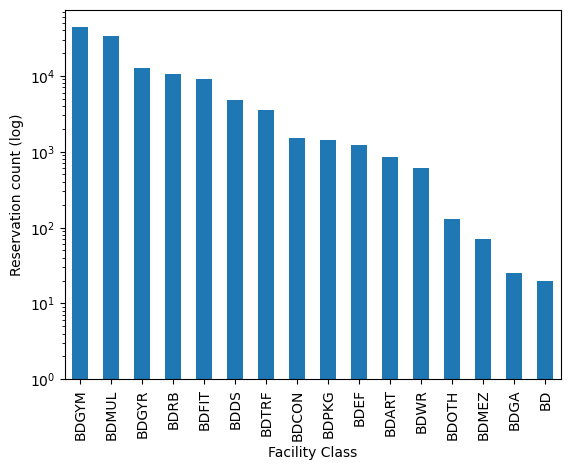

In [18]:
df = pandas.read_csv('/Users/patrickmoll/Desktop/cis590data/DateTimeCleanedData/DateTimeCleanedReservationsAll.csv')
df['Reservation Count'] = 1
fig, ax = plt.subplots()
#ax.set_title("Frequencies of reservations by Facility Class (log)")
df['Facility Class'].value_counts().plot(ax=ax, kind='bar', log=True)
ax.set_xlabel('Facility Class')
ax.set_ylabel('Reservation count (log)')
#plt.savefig("figures/Frequencies of reservations by Facility Class (log).pdf", format="pdf", bbox_inches="tight")

## Facility Location Frequency

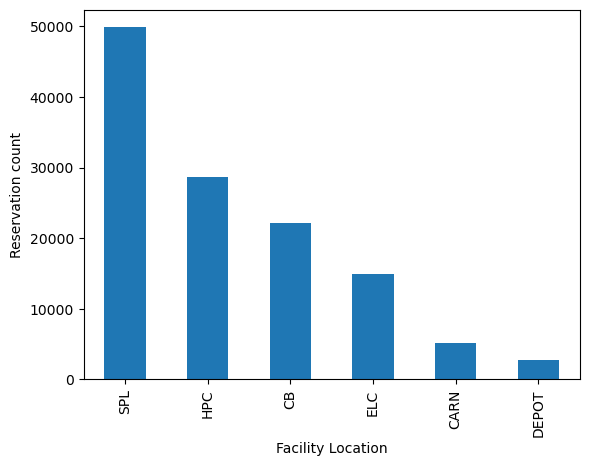

In [19]:
fig, ax = plt.subplots()
#ax.set_title("Frequencies of reservations by Facility Location")
df['Facility Location'].value_counts().plot(ax=ax, kind='bar')
ax.set_xlabel('Facility Location')
ax.set_ylabel('Reservation count')
plt.savefig("figures/Frequencies of reservations by Facility Location.pdf", format="pdf", bbox_inches="tight")

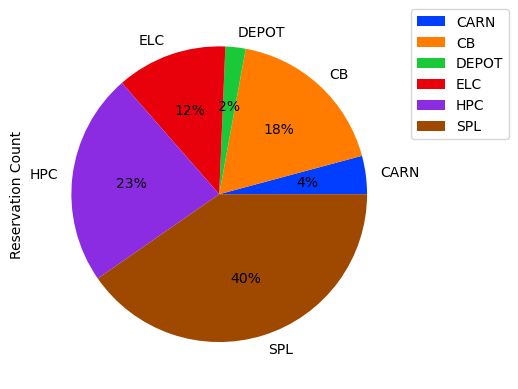

In [28]:
df.groupby(['Facility Location']).sum().plot(kind='pie', colors=colors, y = 'Reservation Count',autopct='%1.0f%%')
#plt.title("Frequencies of reservations by Facility Location")
#place legend in center right of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig("figures/Frequencies of reservations by Facility Location pie.pdf", format="pdf", bbox_inches="tight")

## Facility Code Frequency

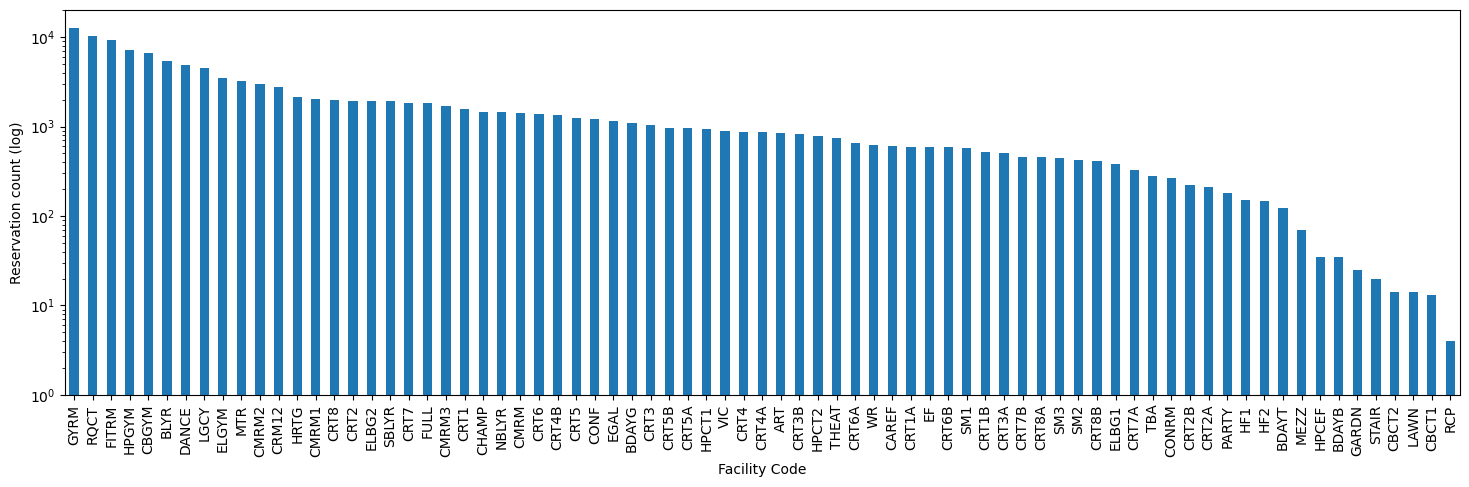

In [206]:
fig, ax = plt.subplots()
#ax.set_title("Frequencies of reservations by Facility Code (log)")
df['Facility Code'].value_counts().plot(ax=ax, kind='bar', figsize=(18, 5), log=True)
ax.set_xlabel('Facility Code')
ax.set_ylabel('Reservation count (log)')
plt.savefig("figures/Frequencies of reservations by Facility Code.pdf", format="pdf", bbox_inches="tight")

## Facility Frequency

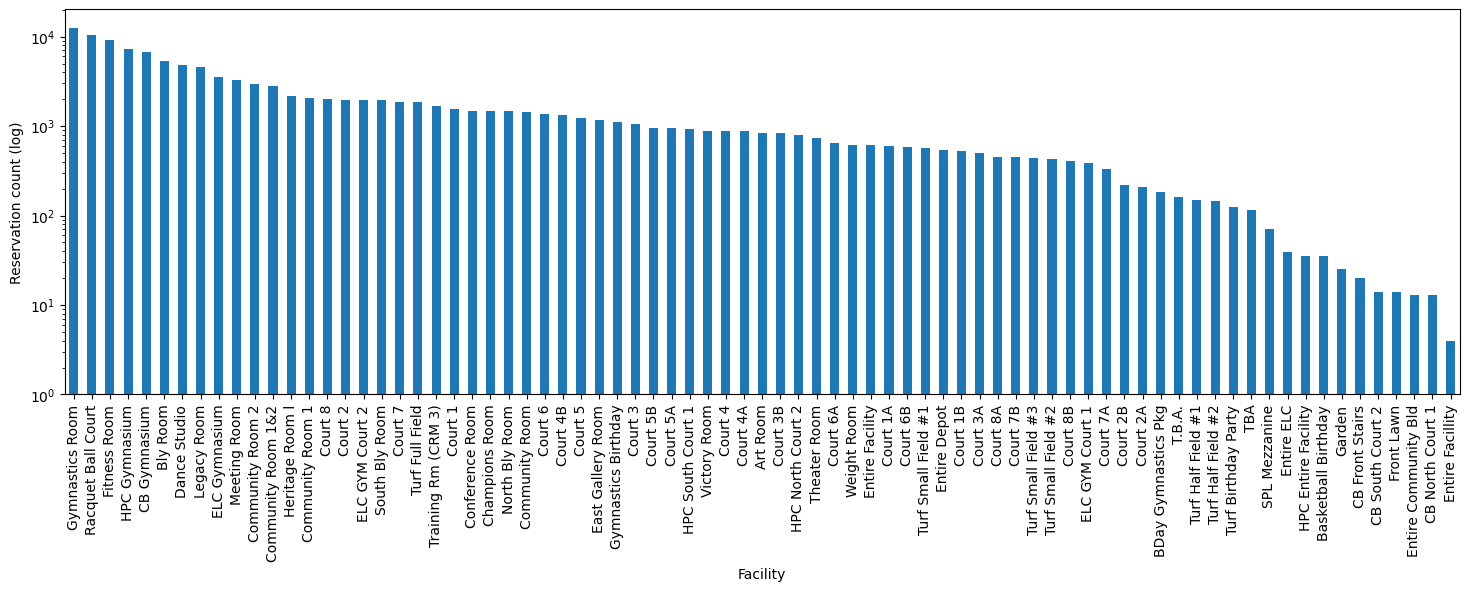

In [208]:
fig, ax = plt.subplots()
#ax.set_title("Frequencies of reservations by Facility (log)")
df['Facility'].value_counts().plot(ax=ax, kind='bar', figsize=(18, 5), log=True)
ax.set_xlabel('Facility')
ax.set_ylabel('Reservation count (log)')
plt.savefig("figures/Frequencies of reservations by Facility (log).pdf", format="pdf", bbox_inches="tight")

## Status Frequency

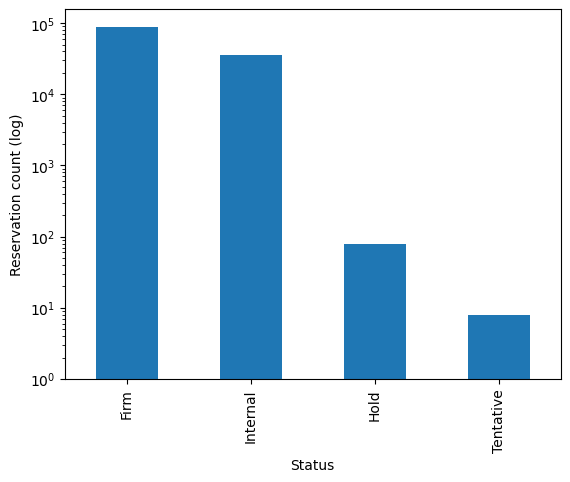

In [209]:
fig, ax = plt.subplots()
#ax.set_title("Frequencies of reservation by Status")
df['Status'].value_counts().plot(ax=ax, kind='bar', log=True)
ax.set_xlabel('Status')
ax.set_ylabel('Reservation count (log)')
plt.savefig("figures/Frequencies of reservations by Status (log).pdf", format="pdf", bbox_inches="tight")

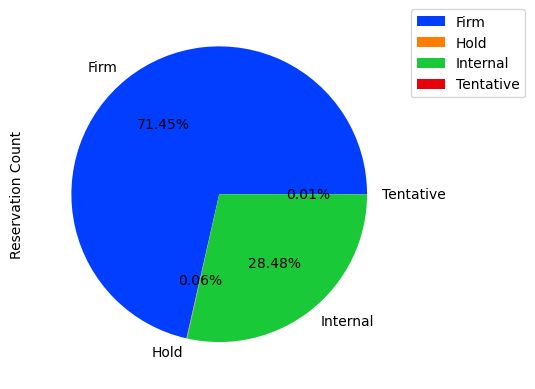

In [29]:
df.groupby(['Status']).sum().plot(kind='pie', colors=colors, y = 'Reservation Count',autopct='%1.2f%%')
#plt.title("Frequencies of reservation by Status")
#place legend in center right of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig("figures/Frequencies of reservations by Status pie.pdf", format="pdf", bbox_inches="tight")

## Reservation Type Frequency

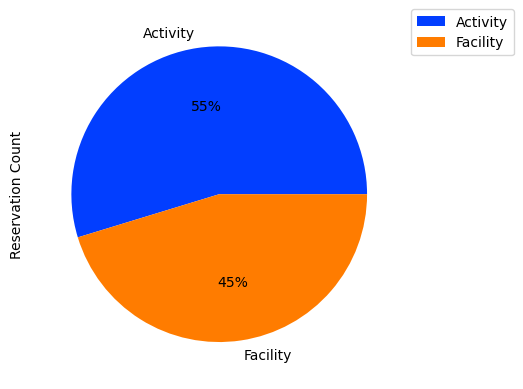

In [30]:
df.groupby(['Reservation Type']).sum().plot(kind='pie', colors=colors, y = 'Reservation Count',autopct='%1.0f%%')
#plt.title("Frequencies of Reservation by Reservation Type")
#place legend in center right of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig("figures/Frequencies of reservations by Reservation Type pie.pdf", format="pdf", bbox_inches="tight")

## Headcount Visualization

38.86912354526925
137.54344893369196


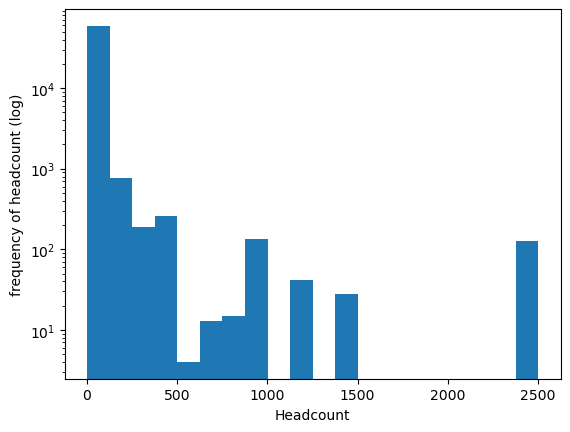

In [214]:
fig, ax = plt.subplots()
plt.hist(df['Headcount'],bins =20, log=True)
mean = df['Headcount'].mean()
std = df['Headcount'].std()
print(mean)
print(std)
#plt.title("Frequency of reservation Headcounts\n Mean: " + '{0:.2f}'.format(mean) +"\nStandard Dev: " + '{0:.2f}'.format(std))
ax.set_xlabel('Headcount')
ax.set_ylabel('frequency of headcount (log)')
plt.savefig("figures/Frequencies of reservation headcounts (log).pdf", format="pdf", bbox_inches="tight")

## Reservation Duration Visualization

140.09442049672865
225.00424255265418


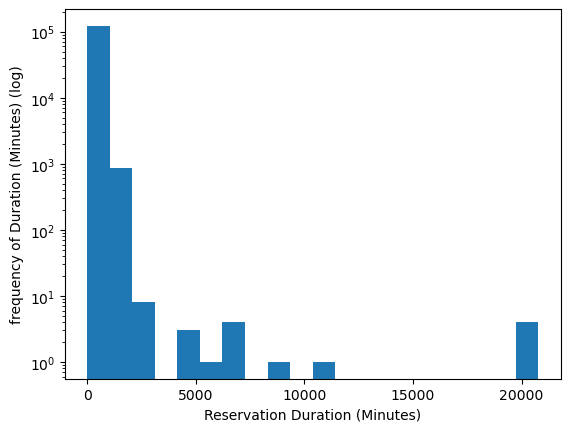

In [215]:
fig, ax = plt.subplots()
plt.hist(df['Duration Minutes'],bins =20, log=True)
mean = df['Duration Minutes'].mean()
std = df['Duration Minutes'].std()
print(mean)
print(std)
#plt.title("Frequency of Reservation Duration Minutes\n Mean: " + '{0:.2f}'.format(mean) +"\nStandard Dev: " + '{0:.2f}'.format(std))
ax.set_xlabel('Reservation Duration (Minutes)')
ax.set_ylabel('frequency of Duration (Minutes) (log)')
plt.savefig("figures/Frequencies of reservation duration minutes (log).pdf", format="pdf", bbox_inches="tight")

## Reservation Date Visualizations

### By day of the week

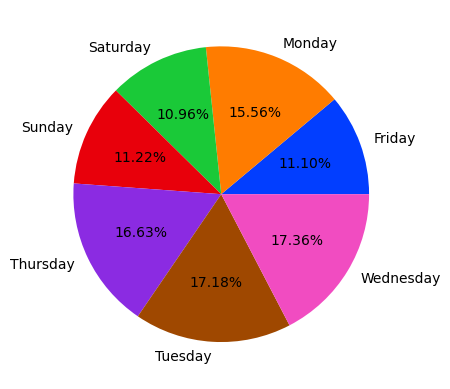

In [33]:
df['weekday'] = pandas.to_datetime(df['BeginTimeDate']).apply(lambda x: x.day_name())
df.groupby(['weekday']).sum().plot(kind='pie', colors=colors, y = 'Reservation Count',autopct='%1.2f%%', legend=None)
plt.ylabel('')
#plt.title("Frequencies of Reservation Day of Week")
plt.savefig("figures/Frequencies of reservations by Day of the Week pie.pdf", format="pdf", bbox_inches="tight")

33.9695054945055
7.234182775524717


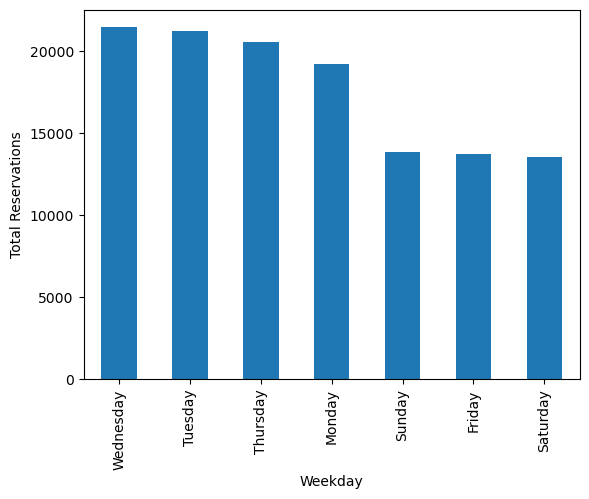

In [217]:
fig, ax = plt.subplots()
mean = df['weekday'].value_counts().mean()/(10*52)
std = df['weekday'].value_counts().std()/(10*52)
#plt.title("Frequency of Reservation by Weekday\n Average number of reservations made in a day: " + '{0:.2f}'.format(mean) +"\nStandard Dev: " + '{0:.2f}'.format(std))
print(mean)
print(std)

df['weekday'].value_counts().plot(ax=ax, kind='bar')
ax.set_xlabel('Weekday')
ax.set_ylabel('Total Reservations')
plt.savefig("figures/Frequencies of reservations by day of week.pdf", format="pdf", bbox_inches="tight")


### By month of the year

In [46]:
import calendar
df['Month'] = pandas.DatetimeIndex(df['BeginTimeDate']).month
df['MonthName'] = df['Month'].apply(lambda x: calendar.month_abbr[x])
# Generate a list of colors based on the "paired" color scheme
colors = sns.color_palette('paired', n_colors=12)
df.groupby(['MonthName']).sum().plot(kind='pie',colors=colors, y = 'Reservation Count',autopct='%1.2f%%', legend=None)
plt.ylabel('')
#plt.title("Frequencies of Reservation by Month")
plt.savefig("figures/Frequencies of reservations by Month pie.pdf", format="pdf", bbox_inches="tight")

ValueError: paired is not a valid palette name

85.86736111111112
12.513637236956653


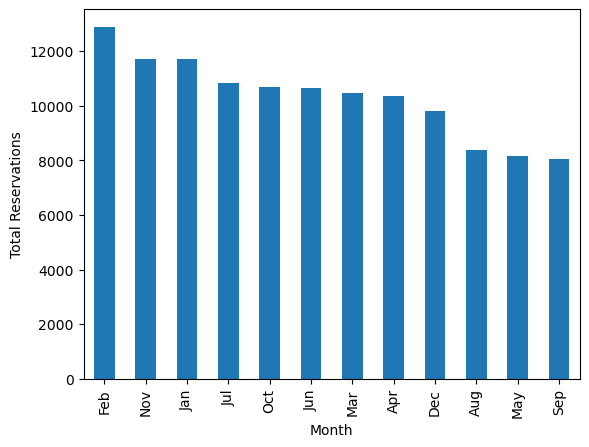

In [219]:
fig, ax = plt.subplots()
mean = df['Month'].value_counts().mean()/(10 * 12)
std = df['Month'].value_counts().std()/(10 * 12)
#plt.title("Frequency of Reservation by Month\n Average number of reservations made in a month: " + '{0:.2f}'.format(mean) +"\nStandard Dev: " + '{0:.2f}'.format(std))
print(mean)
print(std)
df['MonthName'].value_counts().plot(ax=ax, kind='bar')
ax.set_xlabel('Month')
ax.set_ylabel('Total Reservations')
plt.savefig("figures/Frequencies of reservations by Month.pdf", format="pdf", bbox_inches="tight")

## By year (2013 - 2022)

12364.9
3037.3077790116113


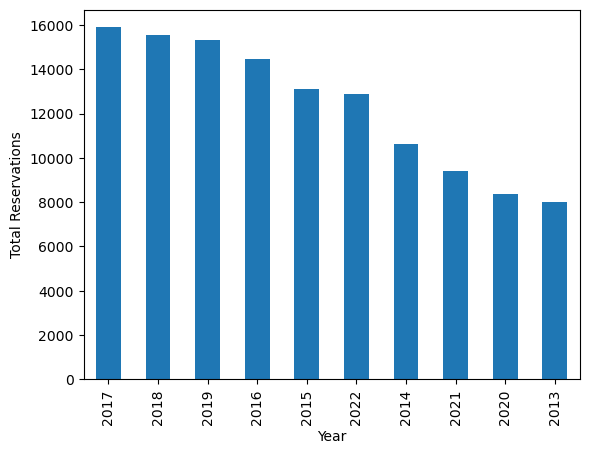

In [220]:
df['Year'] = pandas.DatetimeIndex(df['BeginTimeDate']).year
fig, ax = plt.subplots()
mean = df['Year'].value_counts().mean()
std = df['Year'].value_counts().std()
print(mean)
print(std)
#plt.title("Frequency of Reservation by Year\n Mean: " + '{0:.2f}'.format(mean) +"\nStandard Dev: " + '{0:.2f}'.format(std))
df['Year'].value_counts().plot(ax=ax, kind='bar')
ax.set_xlabel('Year')
ax.set_ylabel('Total Reservations')
plt.savefig("figures/Frequencies of reservations by year.pdf", format="pdf", bbox_inches="tight")